In [245]:
import requests
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

<BarContainer object of 5 artists>

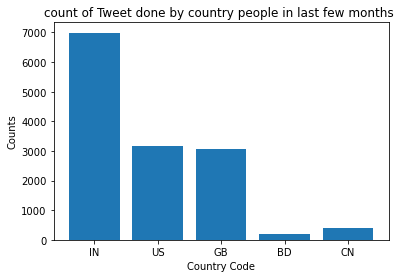

In [269]:
#query1
q1_res = {}
q1_res1  = requests.get("http://localhost:5056//total_tweet_count/IN/2020-05/2022-05")
q1_data1 = q1_res1.json()
# print(q1_data1)
q1_res2  = requests.get("http://localhost:5056//total_tweet_count/US/2020-05/2022-05")
q1_data2 = q1_res2.json()
# print(q1_data2)
q1_res3  = requests.get("http://localhost:5056//total_tweet_count/GB/2020-05/2022-05")
q1_data3 = q1_res3.json()
# print(q1_data3)
q1_res4  = requests.get("http://localhost:5056//total_tweet_count/BD/2020-05/2022-05")
q1_data4 = q1_res4.json()
# print(q1_data4)
q1_res5  = requests.get("http://localhost:5056//total_tweet_count/CN/2020-05/2022-05")
q1_data5 = q1_res5.json()
# print(q1_data5)

q1_res["IN"] = q1_data1["total_tweet_last_n_month"]
q1_res["US"] = q1_data2["total_tweet_last_n_month"]
q1_res["GB"] = q1_data3["total_tweet_last_n_month"]
q1_res["BD"] = q1_data4["total_tweet_last_n_month"]
q1_res["CN"] = q1_data5["total_tweet_last_n_month"]


for key,value in q1_res.items():
    if type(value)==str:
        q1_res[key]=0
        
df_q1 = pd.DataFrame(list(q1_res.items()),columns=["Country_code","Count"])

plt.figure()
plt.rc('xtick', labelsize=10) 
plt.rc('ytick',labelsize=10)
plt.title("count of Tweet done by country people in last few months ") 
plt.xlabel("Country Code")
plt.ylabel("Counts")
plt.bar(df_q1['Country_code'],df_q1['Count'])

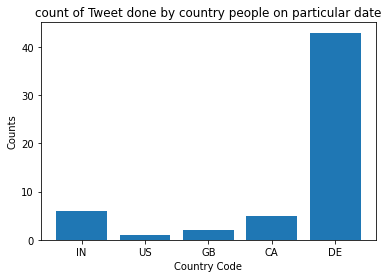

In [270]:
#query2
q2_res = {}
q2_res1 = requests.get("http://localhost:5056/number_of_tweet_per_country/IN/2022-04-26")
q2_data1 = q2_res1.json()
q2_res2 = requests.get("http://localhost:5056/number_of_tweet_per_country/US/2022-04-26")
q2_data2 = q2_res2.json()

q2_res3 = requests.get("http://localhost:5056/number_of_tweet_per_country/GB/2022-04-26")
q2_data3 = q2_res3.json()

q2_res4 = requests.get("http://localhost:5056/number_of_tweet_per_country/CA/2022-04-27")
q2_data4 = q2_res4.json()

q2_res5 = requests.get("http://localhost:5056/number_of_tweet_per_country/DE/2022-04-26")
q2_data5 = q2_res5.json()

q2_res["IN"]=q2_data1["tweet_per_country_on_daily_basis"]
q2_res["US"]=q2_data2["tweet_per_country_on_daily_basis"]
q2_res["GB"]=q2_data3["tweet_per_country_on_daily_basis"]
q2_res["CA"]=q2_data4["tweet_per_country_on_daily_basis"]
q2_res["DE"]=q2_data5["tweet_per_country_on_daily_basis"]

for key,value in q2_res.items():
    if type(value)==str:
        q2_res[key]=0
        
# print(res)
df_q2 = pd.DataFrame(list(q2_res.items()),columns=['Country_Code', 'Count'])
# plt.figure()
plt.title("count of Tweet done by country people on particular date") 
plt.xlabel("Country Code")
plt.ylabel("Counts")
# plt.legend()
plt.bar(df_q2['Country_Code'],df_q2['Count'])
plt.show()

<BarContainer object of 4 artists>

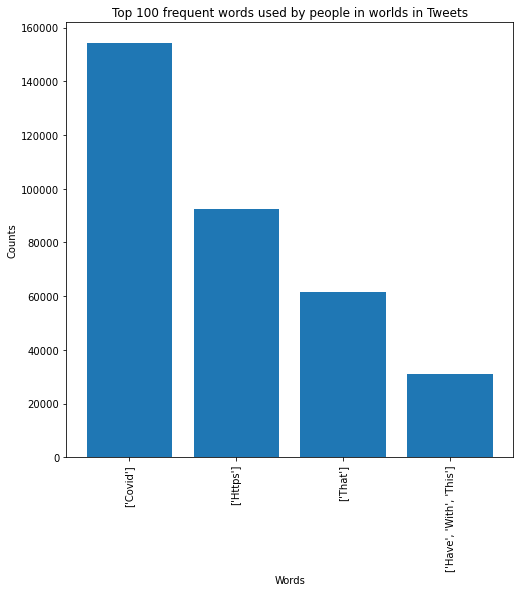

In [271]:
#query3

q3_res = requests.get("http://localhost:5056/top_100_words")
q3_data = q3_res.json()
for key,value in q3_data.items():
    if type(value)==str:
        q3_data[key]=0
df = pd.DataFrame(list(q3_data.items()),columns=['Word', 'Count'])
min_value = df['Count'].min()
max_value = df['Count'].max()
difference = max_value//5
new_data = {}
for key,values in q3_data.items():
    if values>=0 and values<=difference:
        if new_data.get(difference):
            new_data[difference].append(key)
        else:
            new_data[difference] = [key]
    elif values>difference and values<= 2*difference:
        if new_data.get(2*difference):
            new_data[2*difference].append(key)
        else:
            new_data[2*difference] = [key]
    elif values>2*difference and values<=3*difference:
        if new_data.get(3*difference):
            new_data[3*difference].append(key)
        else:
            new_data[3*difference] = [key]
    elif values>3*difference and values<= 4*difference:
        if new_data.get(4*difference):
            new_data[4*difference].append(key)
        else:
            new_data[4*difference] = [key]
    else:
        if new_data.get(max_value):
            new_data[max_value].append(key)
        else:
            new_data[max_value] = [key]
df_q3 = pd.DataFrame(list(new_data.items()),columns=['Count', 'Word'])


plt.figure(figsize=(8,8))
plt.xticks(rotation=90)
plt.title("Top 100 frequent words used by people in worlds in Tweets") 
plt.xlabel("Words")
plt.ylabel("Counts")
# new_df['Colors'] = ['black', 'red', 'green', 'blue']
x_axis = np.arange(1, len(df_q3)+1, 1)
new_list = [ df_q3['Word'].iloc[k][:3] for k in range(0,len(df_q3))]
plt.xticks(x_axis,new_list)
# print(new_df)
plt.bar(x_axis,df_q3['Count'])

In [273]:
#query4
q4_res = requests.get("http://localhost:5056//top_100_words_country_code/IN")
q4_data=q4_res.json()
print(q4_data)
for key,value in q4_data.items():
    if type(value)==str:
        q4_data[key]=0
# print(q4_data)
df_ct = pd.DataFrame(q4_data.items(),columns=['Word', 'Count'])
min_value = df_ct['Count'].min()
max_value = df_ct['Count'].max()
# print(min_value, max_value)
difference = max_value//5
new_data = {}
for key,values in q4_data.items():
    if values>=0 and values<=difference:
        if new_data.get(difference):
            new_data[difference].append(key)
        else:
            new_data[difference] = [key]
    elif values>difference and values<= 2*difference:
        if new_data.get(2*difference):
            new_data[2*difference].append(key)
        else:
            new_data[2*difference] = [key]
    elif values>2*difference and values<=3*difference:
        if new_data.get(3*difference):
            new_data[3*difference].append(key)
        else:
            new_data[3*difference] = [key]
    elif values>3*difference and values<= 4*difference:
        if new_data.get(4*difference):
            new_data[4*difference].append(key)
        else:
            new_data[4*difference] = [key]
    else:
        if new_data.get(max_value):
            new_data[max_value].append(key)
        else:
            new_data[max_value] = [key]
# print(new_data)
df_q4 = pd.DataFrame(list(new_data.items()),columns=['Count', 'Word'],index=["li1","li2","li3","li4"])
plt.figure(figsize=(8,8))
plt.xticks(rotation=90)
plt.title("Top 100 frequent words used by people in worlds in Tweets") 
plt.xlabel("Words")
plt.ylabel("Counts")
x_axis = np.arange(1, len(df_q4)+1, 1)
item_list =  [df_q4['Word'].iloc[k][:3] for k in range(0,len(df_q4))]
plt.xticks(x_axis,item_list)
# new_df['Colors'] = ['black', 'red', 'green', 'blue']
# print(new_df)
plt.bar(x_axis,df_q4['Count'] )



['Covid :7629', 'Https :4649', 'India :2528', 'That :1155', 'Deaths :1048', 'With :949', 'This :887', 'From :876', 'Cases :819', 'Have :813', 'Govt :662', 'Death :612', 'People :576', 'Vaccine :565', 'China :564', 'Dose :562', 'Will :559', 'They :545', 'Pandemic :545', 'Their :512', 'More :510', 'Postponeneetpg :499', 'During :441', 'Data :428', 'Mansukhmandviya :424', 'Over :424', 'Health :413', 'Doctors :409', 'Warriors :406', 'After :401', 'World :386', 'Coronavirus :385', 'Delhi :381', 'Time :379', 'Corona :371', 'Died :370', 'Been :368', 'Report :367', 'Mohfw :364', 'News :358', 'Rahulgandhi :357', 'Were :355', 'Lakh :355', 'Your :353', 'Narendramodi :348', 'Modiji :348', 'When :343', 'Indian :340', 'What :338', 'Being :333', 'There :324', 'Please :323', 'Than :321', 'About :321', 'Pmoindia :310', 'Government :309', 'Support :305', 'Only :304', 'Modi :302', 'Neetpg :301', 'Times :301', 'Vaccination :300', 'Exam :292', 'Million :282', 'Which :280', 'Nation :279', 'Also :277', 'Even

AttributeError: 'list' object has no attribute 'items'

<AxesSubplot:xlabel='country_code'>

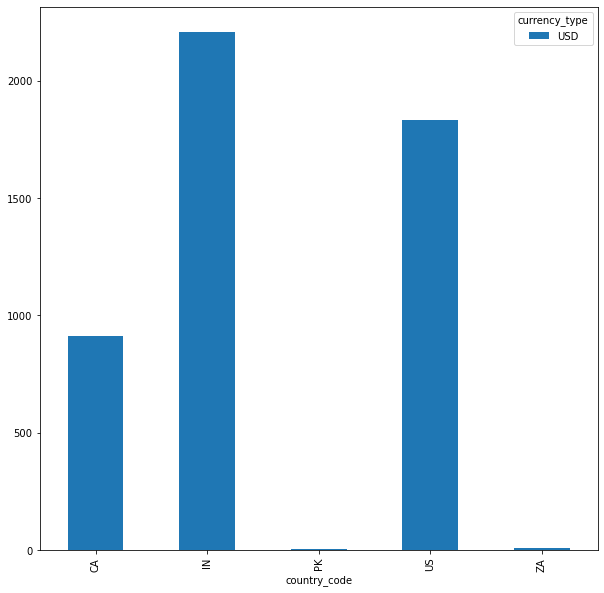

In [250]:
#query5
q5_res = {}
q5_res1 = requests.get("http://localhost:5056/total_no_donations/IN")
q5_data1 = q5_res1.json()
# print(q5_data1)
q5_res2 = requests.get("http://localhost:5056/total_no_donations/US")
q5_data2 = q5_res2.json()
q5_res3 = requests.get("http://localhost:5056/total_no_donations/Pk")
q5_data3 = q5_res3.json()
q5_res4 = requests.get("http://localhost:5056/total_no_donations/CA")
q5_data4 = q5_res4.json()
q5_res5 = requests.get("http://localhost:5056/total_no_donations/ZA")
q5_data5 = q5_res5.json()
#for country code
# q5_data1 = [{'country_code':'IN',"donation_amount":234,"currency_name":"INR"},{'country_code':'IN',"donation_amount":23,"currency_name":"USD"},{'country_code':'IN',"donation_amount":34,"currency_name":"EPR"},{'country_code':'IN',"donation_amount":24,"currency_name":"JYP"}]
for item in q5_data1:
    if q5_res.get('country_code'):
        q5_res['country_code'].append(item['country_code'])
        q5_res['donation_amount'].append(item['donation_amount'])
        q5_res['currency_type'].append(item['currency_name'])
    else:
        q5_res['country_code']=[item['country_code']]
        q5_res['donation_amount']=[item['donation_amount']]
        q5_res['currency_type']=[item['currency_name']]
for item in q5_data2:
    if q5_res.get('country_code'):
        q5_res['country_code'].append(item['country_code'])
        q5_res['donation_amount'].append(item['donation_amount'])
        q5_res['currency_type'].append(item['currency_name'])
    else:
        q5_res['country_code']=[item['country_code']]
        q5_res['donation_amount']=[item['donation_amount']]
        q5_res['currency_type']=[item['currency_name']]
for item in q5_data3:
    if q5_res.get('country_code'):
        q5_res['country_code'].append(item['country_code'])
        q5_res['donation_amount'].append(item['donation_amount'])
        q5_res['currency_type'].append(item['currency_name'])
    else:
        q5_res['country_code']=[item['country_code']]
        q5_res['donation_amount']=[item['donation_amount']]
        q5_res['currency_type']=[item['currency_name']]
for item in q5_data4:
    if q5_res.get('country_code'):
        q5_res['country_code'].append(item['country_code'])
        q5_res['donation_amount'].append(item['donation_amount'])
        q5_res['currency_type'].append(item['currency_name'])
    else:
        q5_res['country_code']=[item['country_code']]
        q5_res['donation_amount']=[item['donation_amount']]
        q5_res['currency_type']=[item['currency_name']]
for item in q5_data5:
    if q5_res.get('country_code'):
        q5_res['country_code'].append(item['country_code'])
        q5_res['donation_amount'].append(item['donation_amount'])
        q5_res['currency_type'].append(item['currency_name'])
    else:
        q5_res['country_code']=[item['country_code']]
        q5_res['donation_amount']=[item['donation_amount']]
        q5_res['currency_type']=[item['currency_name']]

# print(q5_res)
# for idx in range(0,len(q5_res['donation_amount'])):
#     if type(q5_res['donation_amount'][idx])==str:
#         q5_res['donation_amount'][idx]=0
     
df_q5 = pd.DataFrame(q5_res)


unique_country_code = df_q5['country_code'].unique()
unique_number = [i for i in range(1,len(unique_country_code)+1)]
dict_country_code_with_num = {unique_country_code[i]:unique_number[i] for i in range(len(unique_number))}
# print(df_q5)
df_q5.pivot('country_code','currency_type','donation_amount').plot.bar(figsize=(10,10))


<BarContainer object of 5 artists>

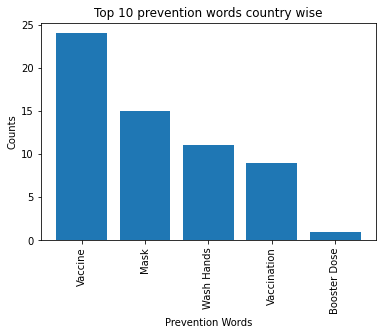

In [251]:
#query 6a
q6a_res = requests.get("http://localhost:5056/top_10_preventions/IN")
q6a_data=q6a_res.json()
df_q6a = pd.DataFrame(q6a_data.items(),columns=['Preventive_Word', 'Count'])
plt.figure()
plt.title("Top 10 prevention words country wise")
plt.xlabel("Prevention Words")
plt.ylabel("Counts")
plt.xticks(rotation=90)
plt.bar(df_q6a['Preventive_Word'],df_q6a['Count'])

<BarContainer object of 8 artists>

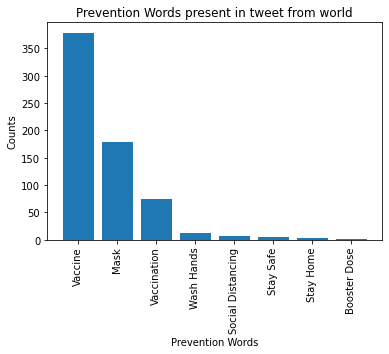

In [252]:
#query 6b
q6b_res = requests.get("http://localhost:5056/top_10_preventions_all_countries")
q6b_data=q6b_res.json()
df_q6b = pd.DataFrame(q6b_data.items(),columns=['Preventive_Word', 'Count'])
# import matplotlib.pyplot as plt
plt.figure()
plt.title("Prevention Words present in tweet from world")
plt.xlabel("Prevention Words")
plt.ylabel("Counts")
plt.xticks(rotation=90)
plt.bar(df_q6b['Preventive_Word'],df_q6b['Count'])


<BarContainer object of 5 artists>

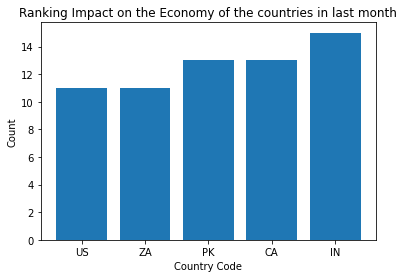

In [253]:
#query7a
q7a_res = {}
q7a_res1 = requests.get("http://localhost:5056/impact_analysis_on_economy_keys_by_months/IN")
q7a_data1= q7a_res1.json()
# print(q7a_data1)
q7a_res2 = requests.get("http://localhost:5056/impact_analysis_on_economy_keys_by_months/US")
q7a_data2 = q7a_res2.json()
q7a_res3 = requests.get("http://localhost:5056/impact_analysis_on_economy_keys_by_months/PK")
q7a_data3 = q7a_res3.json()
q7a_res4 = requests.get("http://localhost:5056/impact_analysis_on_economy_keys_by_months/CA")
q7a_data4 = q7a_res4.json()
q7a_res5 = requests.get("http://localhost:5056/impact_analysis_on_economy_keys_by_months/ZA")
q7a_data5 = q7a_res5.json()
# print(q7a_res1.json())
q7a_res["IN"]=q7a_data1["count"]
# print(res)
q7a_res["US"]=q7a_data2["count"]
# print(res)
q7a_res["PK"]=q7a_data3["count"]
# print(res)
q7a_res["CA"]=q7a_data4["count"]
# print(res)
q7a_res["ZA"]=q7a_data5["count"]
for key,value in q7a_res.items():
    if type(value)==str:
        q7a_res[key]=0
# print(res)
df_q7a = pd.DataFrame(list(q7a_res.items()),columns=['Country_code', 'Count'])
# import matplotlib.pyplot as plt
df_q7a=df_q7a.sort_values(by=['Count'])
plt.figure()
plt.title("Ranking Impact on the Economy of the countries in last month")
plt.xlabel("Country Code")
plt.ylabel("Count")
plt.bar(df_q7a['Country_code'],df_q7a['Count'])



<BarContainer object of 5 artists>

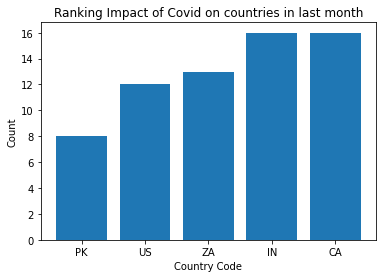

In [254]:
#query7b
q7b_res = {}
q7b_res1 = requests.get("http://localhost:5056/impact_analysis_on_covid_keys_by_months/IN")
q7b_data1= q7b_res1.json()
q7b_res2 = requests.get("http://localhost:5056/impact_analysis_on_covid_keys_by_months/US")
q7b_data2 = q7b_res2.json()
q7b_res3 = requests.get("http://localhost:5056/impact_analysis_on_covid_keys_by_months/PK")
q7b_data3 = q7b_res3.json()
q7b_res4 = requests.get("http://localhost:5056/impact_analysis_on_covid_keys_by_months/CA")
q7b_data4 = q7b_res4.json()
q7b_res5 = requests.get("http://localhost:5056/impact_analysis_on_covid_keys_by_months/ZA")
q7b_data5 = q7b_res5.json()
# print(q7b_res1.json())
q7b_res["IN"]=q7b_data1["count"]
# print(res)
q7b_res["US"]=q7b_data2["count"]
# print(res)
q7b_res["PK"]=q7b_data3["count"]
# print(res)
q7b_res["CA"]=q7b_data4["count"]
# print(res)
q7b_res["ZA"]=q7b_data5["count"]
for key,value in q7b_res.items():
    if type(value)==str:
        q7b_res[key]=0
# print(res)
df_q7b = pd.DataFrame(list(q7b_res.items()),columns=['Country_code', 'Count'])
# import matplotlib.pyplot as plt
df_q7b=df_q7b.sort_values(by=['Count'])
plt.figure()
plt.title("Ranking Impact of Covid on countries in last month")
plt.xlabel("Country Code")
plt.ylabel("Count")
plt.bar(df_q7b['Country_code'],df_q7b['Count'])

<BarContainer object of 5 artists>

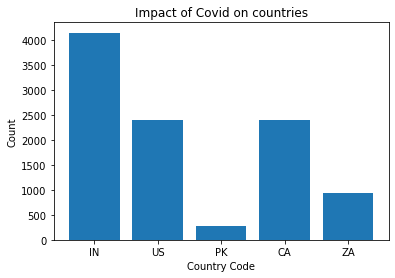

In [255]:
#query8a
q8a_res = {}
q8a_res1 = requests.get("http://localhost:5056/impact_analysis_on_covid_keys/IN")
# print(q8a_res1.json())
q8a_data1= q8a_res1.json()
q8a_res2 = requests.get("http://localhost:5056/impact_analysis_on_covid_keys/US")
q8a_data2 = q8a_res2.json()
q8a_res3 = requests.get("http://localhost:5056/impact_analysis_on_covid_keys/PK")
q8a_data3 = q8a_res3.json()
q8a_res4 = requests.get("http://localhost:5056/impact_analysis_on_covid_keys/CA")
q8a_data4 = q8a_res4.json()
q8a_res5 = requests.get("http://localhost:5056/impact_analysis_on_covid_keys/ZA")
q8a_data5 = q8a_res5.json()
q8a_res["IN"]=q8a_data1["count"]
# print(res)
q8a_res["US"]=q8a_data2["count"]
# print(res)
q8a_res["PK"]=q8a_data3["count"]
# print(res)
q8a_res["CA"]=q8a_data4["count"]
# print(res)
q8a_res["ZA"]=q8a_data5["count"]
for key,value in q8a_res.items():
    if type(value)==str:
        q8a_res[key]=0
# print(res)
df_q8a = pd.DataFrame(list(q8a_res.items()),columns=['Country_code', 'Count'])
# import matplotlib.pyplot as plt
plt.figure()
plt.title("Impact of Covid on countries")
plt.xlabel("Country Code")
plt.ylabel("Count")
plt.bar(df_q8a['Country_code'],df_q8a['Count'])

<BarContainer object of 5 artists>

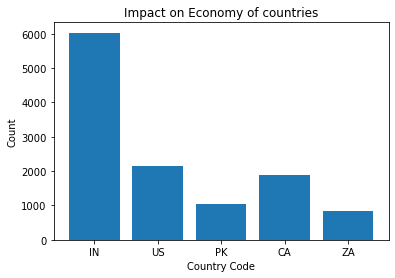

In [256]:
#query8b
q8b_res = {}
q8b_res1 = requests.get("http://localhost:5056/impact_analysis_on_economy_keys/IN")
q8b_data1= q8b_res1.json()
q8b_res2 = requests.get("http://localhost:5056/impact_analysis_on_economy_keys/US")
q8b_data2 = q8b_res2.json()
q8b_res3 = requests.get("http://localhost:5056/impact_analysis_on_economy_keys/PK")
q8b_data3 = q8b_res3.json()
q8b_res4 = requests.get("http://localhost:5056/impact_analysis_on_economy_keys/CA")
q8b_data4 = q8b_res4.json()
q8b_res5 = requests.get("http://localhost:5056/impact_analysis_on_economy_keys/ZA")
q8b_data5 = q8b_res5.json()
q8b_res["IN"]=q8b_data1["count"]
# print(res)
q8b_res["US"]=q8b_data2["count"]
# print(res)
q8b_res["PK"]=q8b_data3["count"]
# print(res)
q8b_res["CA"]=q8b_data4["count"]
# print(res)
q8b_res["ZA"]=q8b_data5["count"]
for key,value in q8b_res.items():
    if type(value)==str:
        q8b_res[key]=0
# print(res)
df_q8b = pd.DataFrame(list(q8b_res.items()),columns=['Country_code', 'Count'])
# import matplotlib.pyplot as plt
plt.figure()
plt.title("Impact on Economy of countries")
plt.xlabel("Country Code")
plt.ylabel("Count")
plt.bar(df_q8b['Country_code'],df_q8b['Count'])